In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from google.colab import drive

In [7]:
#drive.mount('/content/drive') # Uncomment if loading from Google Drive
#cancer_df = pd.read_csv('/content/drive/My Drive/PROYECTOS/DM_II_project/data/raw/patient_train_data.csv') # Uncomment if loading from Google Drive .Load the data from Google Drive
cancer_df = pd.read_csv('g:/Mi unidad/PROYECTOS/DM_II_project/data/raw/patient_train_data.csv') # Uncomment if loading from local directory

# 1. GENERAL ANALYSIS

In [8]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75035 entries, 0 to 75034
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75035 non-null  int64  
 1   Alcohol Consumption         74983 non-null  object 
 2   Cancer Stage                75022 non-null  object 
 3   Country                     74985 non-null  object 
 4   Date of Birth               74975 non-null  object 
 5   Diabetes                    75021 non-null  object 
 6   Diabetes History            75035 non-null  object 
 7   Diet Risk                   74987 non-null  object 
 8   Early Detection             75005 non-null  object 
 9   Family History              74989 non-null  object 
 10  Gender                      74956 non-null  object 
 11  Genetic Mutation            75005 non-null  object 
 12  Healthcare Access           74972 non-null  object 
 13  Healthcare Costs            749

In [9]:
cancer_df.head()

,ID,Alcohol Consumption,Cancer Stage,Country,Date of Birth,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,...,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Transfusion History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction
0,1,No,Localized,UK,29-01-1966,No,No,Moderate,No,No,...,Yes,Overweight,Low,Regular,No,-,Chemotherapy,33.0,Urban,Yes
1,2,No,Regional,Japan,21-12-1958,No,No,Low,No,No,...,No,Normal,Low,Irregular,Yes,-,Chemotherapy,17.0,Urban,No
2,3,No,Localized,France,16-06-1959,No,No,Low,Yes,No,...,No,Normal,Moderate,Never,Yes,-,Surgery,34.0,Urban,Yes
3,4,Yes,Localized,Japan,18-01-1956,Yes,No,Moderate,No,No,...,Yes,Obese,Low,Regular,No,-,Radiotherapy,71.0,Urban,No
4,5,No,Regional,USA,04-05-1975,No,No,Moderate,Yes,Yes,...,Yes,Overweight,Low,Regular,No,-,Radiotherapy,48.0,Rural,Yes


In [10]:
continuous_var_df = cancer_df.select_dtypes(include=['float64']).copy()
categorical_var_df = cancer_df.drop(columns=['Date of Birth']).select_dtypes(include=['object']).copy()

# 2. CATEGORICAL VARIABLES EDA

## 2.1. DESCRIPTIVE STATISTICS

In [11]:
categorical_var_df.describe(include="all").T

,count,unique,top,freq
Alcohol Consumption,74983,2,No,37510
Cancer Stage,75022,3,Regional,29882
Country,74985,16,USA,11627
Diabetes,75021,2,No,60078
Diabetes History,75035,2,No,75025
Diet Risk,74987,3,Moderate,37630
Early Detection,75005,2,Yes,44883
Family History,74989,2,No,52458
Gender,74956,3,M,44999
Genetic Mutation,75005,2,No,63882


In [12]:
for column in categorical_var_df.columns:
    print(f"'\n'{column} unique values: {categorical_var_df[column].unique()}")

'
'Alcohol Consumption unique values: ['No' 'Yes' nan]
'
'Cancer Stage unique values: ['Localized' 'Regional' 'Metastatic' nan]
'
'Country unique values: ['UK' 'Japan' 'France' 'USA' 'China' 'South Korea' 'Brazil' 'Germany'
 'Canada' 'Pakistan' 'Italy' 'New Zealand' 'South Africa' 'India'
 'Nigeria' 'Australia' nan]
'
'Diabetes unique values: ['No' 'Yes' nan]
'
'Diabetes History unique values: ['No' 'Yes']
'
'Diet Risk unique values: ['Moderate' 'Low' 'High' nan]
'
'Early Detection unique values: ['No' 'Yes' nan]
'
'Family History unique values: ['No' 'Yes' nan]
'
'Gender unique values: ['M' 'F' nan 'P']
'
'Genetic Mutation unique values: ['No' 'Yes' nan]
'
'Healthcare Access unique values: ['High' 'Moderate' 'Low' '?' nan]
'
'Heart Disease History unique values: ['No' 'Yes']
'
'Hypertension unique values: ['Yes' 'No']
'
'Inflammatory Bowel Disease unique values: ['No' 'Yes' nan]
'
'Insurance Costs unique values: ['Basic' 'No insurance' 'Extended']
'
'Insurance Status unique values: ['

In [13]:
print(categorical_var_df.nunique())

Alcohol Consumption            2
Cancer Stage                   3
Country                       16
Diabetes                       2
Diabetes History               2
Diet Risk                      3
Early Detection                2
Family History                 2
Gender                         3
Genetic Mutation               2
Healthcare Access              4
Heart Disease History          2
Hypertension                   2
Inflammatory Bowel Disease     2
Insurance Costs                3
Insurance Status               2
Non Smoker                     2
Obesity BMI                    3
Physical Activity              3
Screening History              3
Smoking History                2
Transfusion History            1
Treatment Type                 4
Urban or Rural                 4
Survival Prediction            2
dtype: int64


## 2.2. DISTRIBUTION ANALYSIS

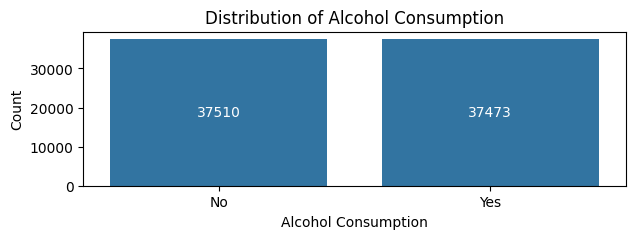

Alcohol Consumption
No     37510
Yes    37473
Name: count, dtype: int64


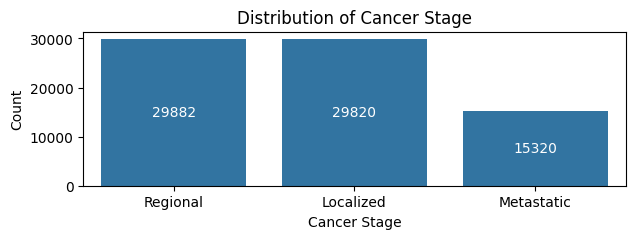

Cancer Stage
Regional      29882
Localized     29820
Metastatic    15320
Name: count, dtype: int64


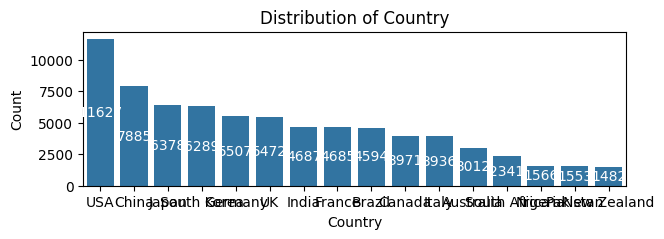

Country
USA             11627
China            7885
Japan            6378
South Korea      6289
Germany          5507
UK               5472
India            4687
France           4685
Brazil           4594
Canada           3971
Italy            3936
Australia        3012
South Africa     2341
Nigeria          1566
Pakistan         1553
New Zealand      1482
Name: count, dtype: int64


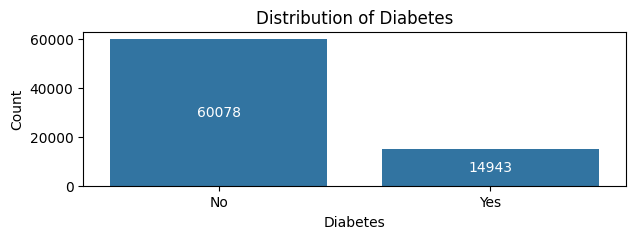

Diabetes
No     60078
Yes    14943
Name: count, dtype: int64


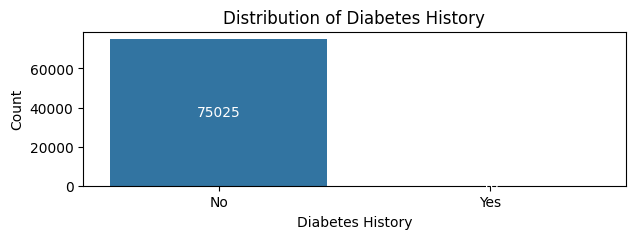

Diabetes History
No     75025
Yes       10
Name: count, dtype: int64


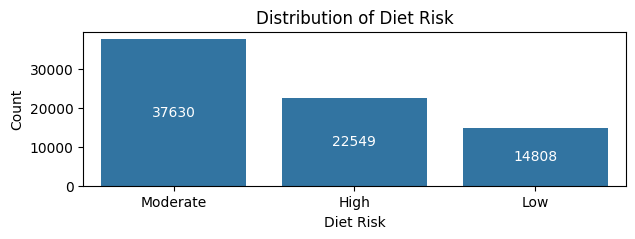

Diet Risk
Moderate    37630
High        22549
Low         14808
Name: count, dtype: int64


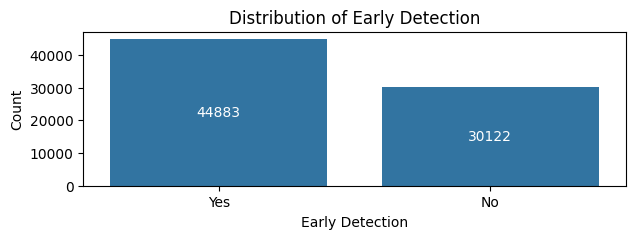

Early Detection
Yes    44883
No     30122
Name: count, dtype: int64


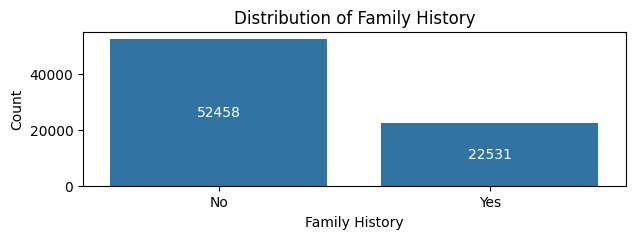

Family History
No     52458
Yes    22531
Name: count, dtype: int64


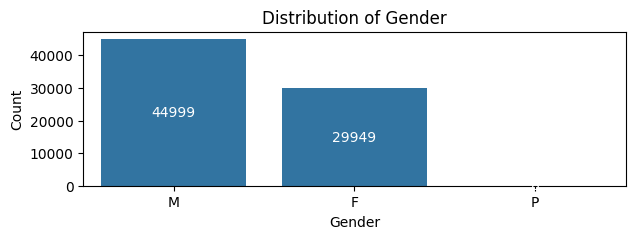

Gender
M    44999
F    29949
P        8
Name: count, dtype: int64


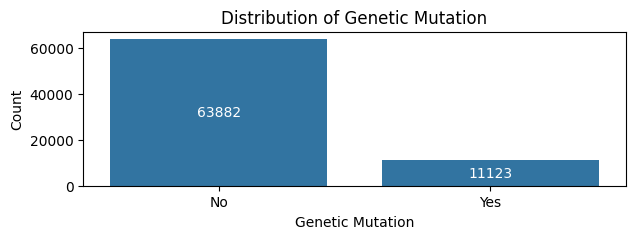

Genetic Mutation
No     63882
Yes    11123
Name: count, dtype: int64


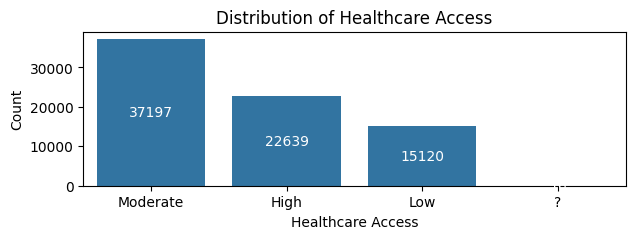

Healthcare Access
Moderate    37197
High        22639
Low         15120
?              16
Name: count, dtype: int64


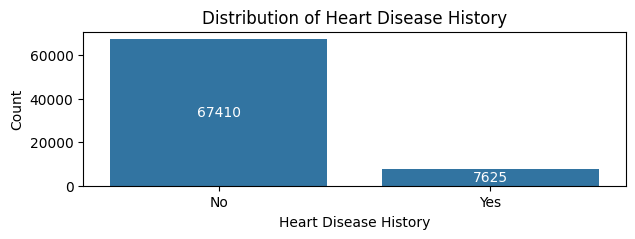

Heart Disease History
No     67410
Yes     7625
Name: count, dtype: int64


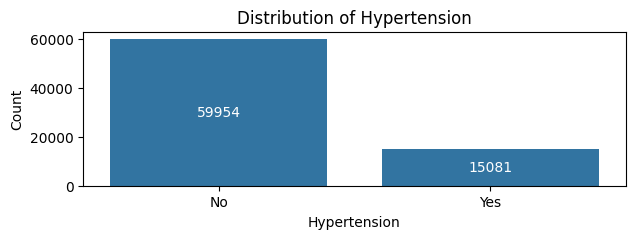

Hypertension
No     59954
Yes    15081
Name: count, dtype: int64


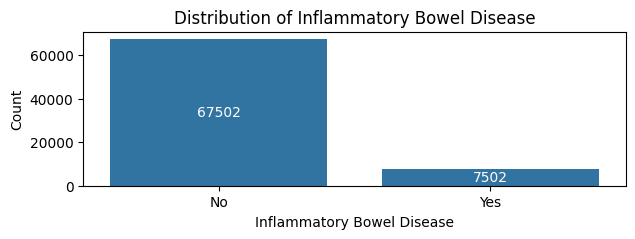

Inflammatory Bowel Disease
No     67502
Yes     7502
Name: count, dtype: int64


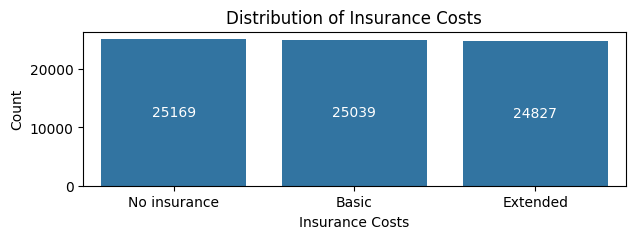

Insurance Costs
No insurance    25169
Basic           25039
Extended        24827
Name: count, dtype: int64


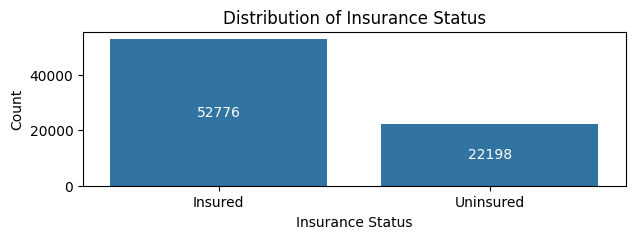

Insurance Status
Insured      52776
Uninsured    22198
Name: count, dtype: int64


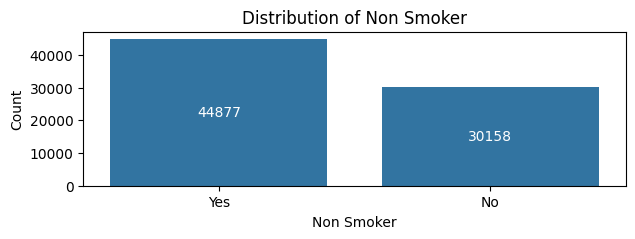

Non Smoker
Yes    44877
No     30158
Name: count, dtype: int64


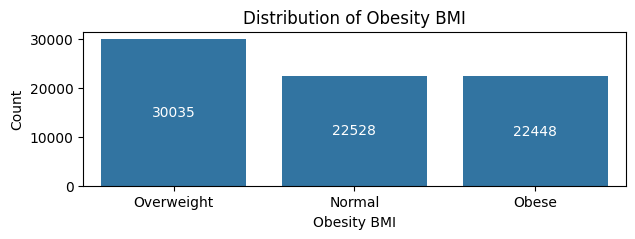

Obesity BMI
Overweight    30035
Normal        22528
Obese         22448
Name: count, dtype: int64


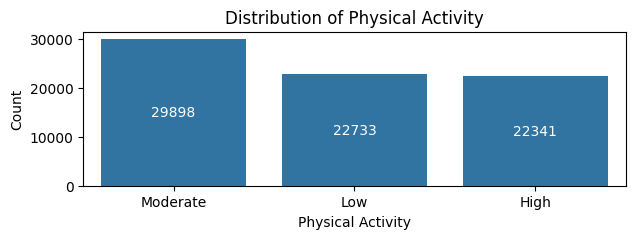

Physical Activity
Moderate    29898
Low         22733
High        22341
Name: count, dtype: int64


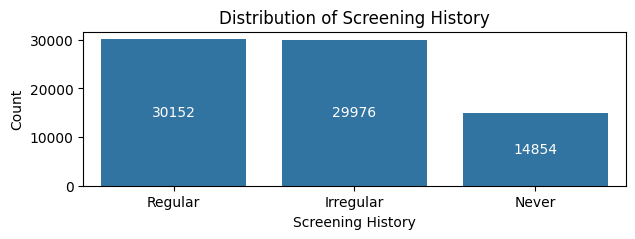

Screening History
Regular      30152
Irregular    29976
Never        14854
Name: count, dtype: int64


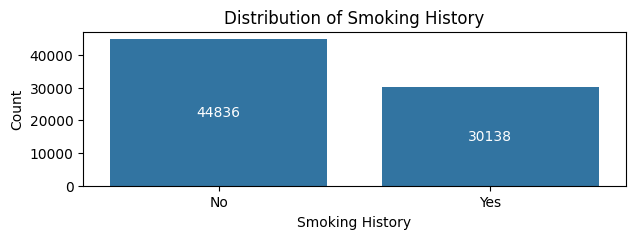

Smoking History
No     44836
Yes    30138
Name: count, dtype: int64


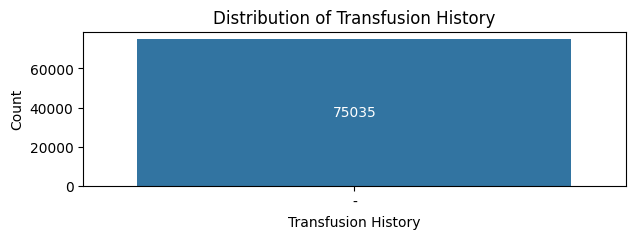

Transfusion History
-    75035
Name: count, dtype: int64


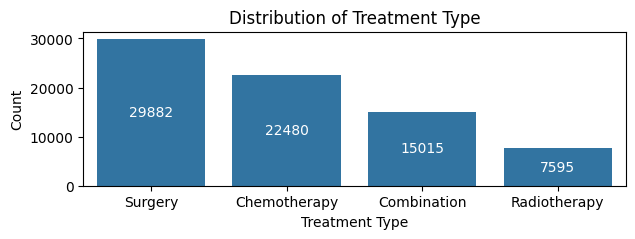

Treatment Type
Surgery         29882
Chemotherapy    22480
Combination     15015
Radiotherapy     7595
Name: count, dtype: int64


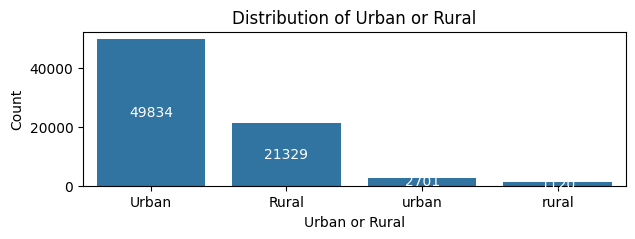

Urban or Rural
Urban    49834
Rural    21329
urban     2701
rural     1120
Name: count, dtype: int64


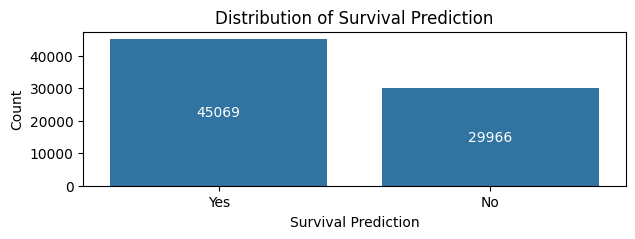

Survival Prediction
Yes    45069
No     29966
Name: count, dtype: int64


In [14]:
for i in categorical_var_df.columns:
    plt.figure(figsize=(7, 2))
    sns.countplot(x=categorical_var_df[i], order=categorical_var_df[i].value_counts().index)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.title(f'Distribution of {i}')
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2.), ha='center', va='center', color='white', fontsize=10)
    plt.show()
    print(categorical_var_df[i].value_counts())

## 2.3. NULL VALUES ANALYSIS

In [15]:
null_count_cat = categorical_var_df.isna().sum().sort_values(ascending=False)
null_proportion_cat = null_count_cat / len(categorical_var_df)
null_df = null_count_cat.to_frame(name='Null Count').join(round(null_proportion_cat.to_frame(name='Null Proportion')*100, 2))
print(null_df)

                            Null Count  Null Proportion
Gender                              79             0.11
Physical Activity                   63             0.08
Treatment Type                      63             0.08
Healthcare Access                   63             0.08
Insurance Status                    61             0.08
Smoking History                     61             0.08
Screening History                   53             0.07
Alcohol Consumption                 52             0.07
Urban or Rural                      51             0.07
Country                             50             0.07
Diet Risk                           48             0.06
Family History                      46             0.06
Inflammatory Bowel Disease          31             0.04
Genetic Mutation                    30             0.04
Early Detection                     30             0.04
Obesity BMI                         24             0.03
Diabetes                            14          

## 2.4. ANALYSIS AGAINST TARGET

In [16]:
for i in categorical_var_df.drop(columns='Survival Prediction').columns:
        print(pd.crosstab(categorical_var_df['Survival Prediction'], categorical_var_df[i]))

Alcohol Consumption     No    Yes
Survival Prediction              
No                   15010  14933
Yes                  22500  22540
Cancer Stage         Localized  Metastatic  Regional
Survival Prediction                                 
No                       11854        6127     11982
Yes                      17966        9193     17900
Country              Australia  Brazil  Canada  China  France  Germany  India  \
Survival Prediction                                                             
No                        1140    1830    1563   3196    1913     2239   1869   
Yes                       1872    2764    2408   4689    2772     3268   2818   

Country              Italy  Japan  New Zealand  Nigeria  Pakistan  \
Survival Prediction                                                 
No                    1641   2511          583      637       645   
Yes                   2295   3867          899      929       908   

Country              South Africa  South Korea    

# 3. CONTINUOUS VARIABLES EDA

## 3.1. DESCRIPTIVE STATISTICS

In [17]:
continuous_var_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Healthcare Costs,74982.0,72551.277478,27536.228351,-69123.238747,48788.25,72531.5,96426.75,213690.042716
Incidence Rate per 100K,74999.0,34.552283,14.511506,10.000000,22.00,34.0,47.00,109.212990
Marital Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortality Rate per 100K,74974.0,17.054440,7.206834,-16.612959,11.00,17.0,23.00,51.679554
Tumor Size (mm),74962.0,42.054665,21.733090,5.000000,23.00,42.0,61.00,155.758628


In [18]:
continuous_var_df['Healthcare Costs'][continuous_var_df['Healthcare Costs'] < 0]

13310   -40285.523429
13416   -49070.211473
13539   -55362.691071
15101   -45501.986313
16704   -69123.238747
18155   -55034.508719
20602   -68788.722741
45991   -58644.752880
46107   -61051.083317
52628   -66128.821178
65276   -40547.198001
Name: Healthcare Costs, dtype: float64

In [19]:
continuous_var_df['Mortality Rate per 100K'][continuous_var_df['Mortality Rate per 100K'] < 0]

50177   -16.013792
52102   -16.612959
Name: Mortality Rate per 100K, dtype: float64

## 3.2. DISTRIBUTION ANALYSIS

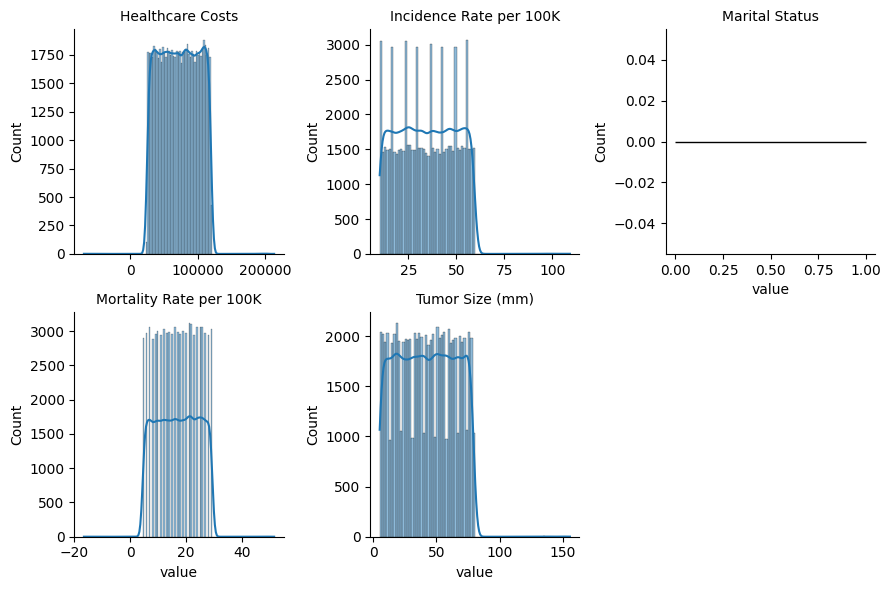

In [20]:
g = sns.FacetGrid(continuous_var_df.melt(), col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "value", kde=True)
g.set_titles("{col_name}")
plt.show()

In [21]:
skewness = continuous_var_df.drop(columns='Marital Status').select_dtypes(include=['number']).skew()

skewness_sorted = skewness.sort_values(ascending=False)

print("Skewness:")
print(skewness_sorted)

Skewness:
Incidence Rate per 100K    0.027104
Tumor Size (mm)            0.021154
Healthcare Costs          -0.001733
Mortality Rate per 100K   -0.005866
dtype: float64


## 3.3. OUTLIERS DETECTION

In [22]:
def outlier_detection(column):
    Q1 = continuous_var_df[column].quantile(0.25)
    Q3 = continuous_var_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((continuous_var_df[column] < (Q1 - 1.5 * IQR)) | (continuous_var_df[column] > (Q3 + 1.5 * IQR))).sum()
    return outliers

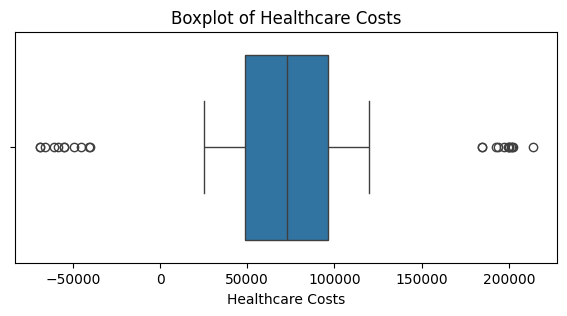

Number of outliers for column "Healthcare Costs": 23


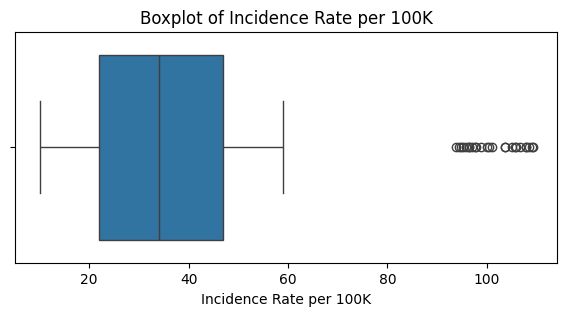

Number of outliers for column "Incidence Rate per 100K": 25


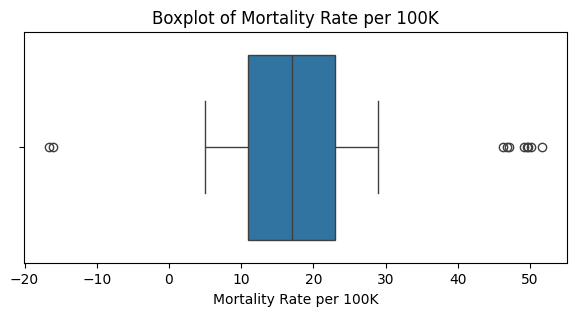

Number of outliers for column "Mortality Rate per 100K": 10


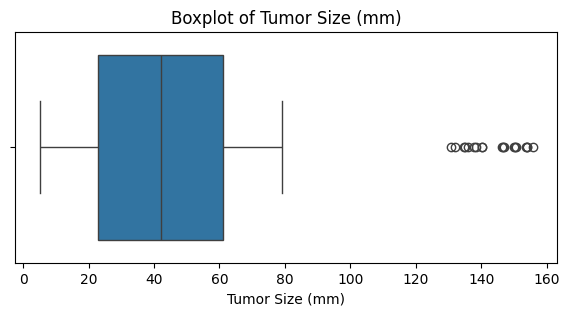

Number of outliers for column "Tumor Size (mm)": 19


In [23]:
for column in continuous_var_df.drop(columns='Marital Status').columns:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=continuous_var_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    print(f'Number of outliers for column "{column}": {outlier_detection(column)}')

## 3.4. NULL VALUES ANALYSIS

In [24]:
null_count_cont = continuous_var_df.isna().sum().sort_values(ascending=False)
null_proportion_cont = null_count_cont / len(continuous_var_df)
null_df_cont = null_count_cont.to_frame(name='Null Count').join(round(null_proportion_cont.to_frame(name='Null Proportion')*100, 2))
print(null_df_cont)

                         Null Count  Null Proportion
Marital Status                75035           100.00
Tumor Size (mm)                  73             0.10
Mortality Rate per 100K          61             0.08
Healthcare Costs                 53             0.07
Incidence Rate per 100K          36             0.05


## 3.5. CORRELATION ANALYSIS

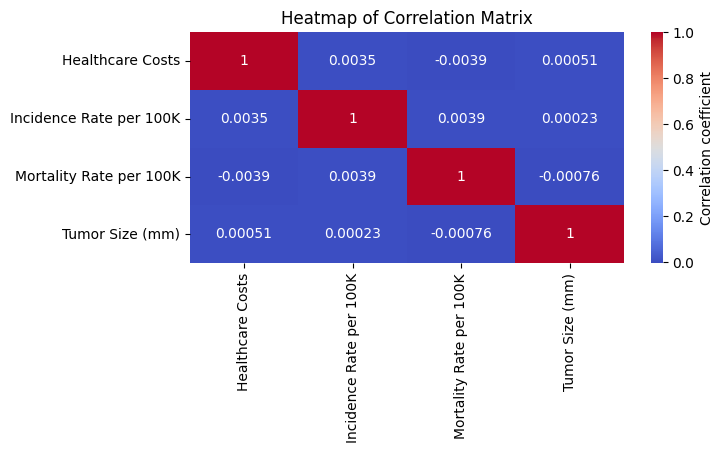

In [25]:
correlation_matrix = continuous_var_df.drop(columns='Marital Status', axis=1).corr()
plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Heatmap of Correlation Matrix')
plt.show()

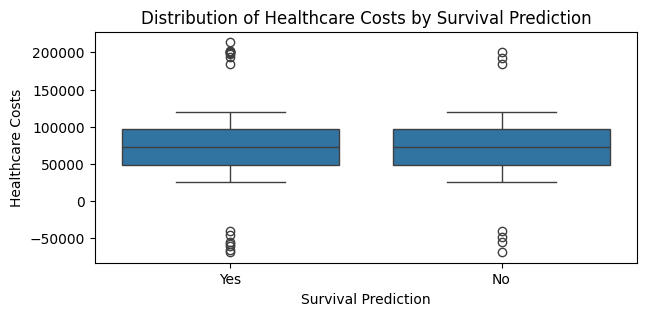

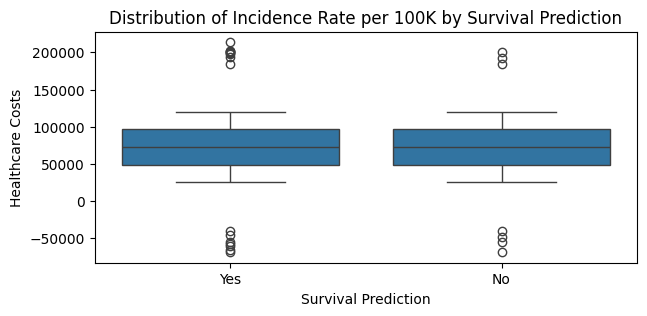

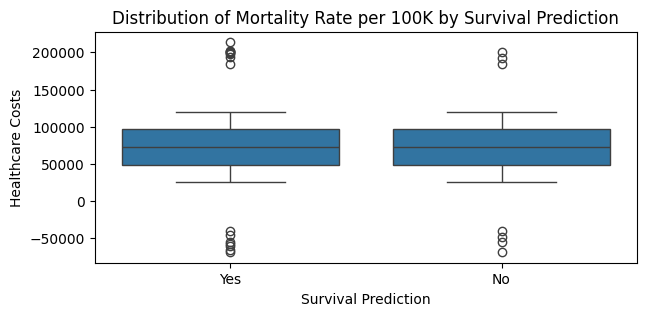

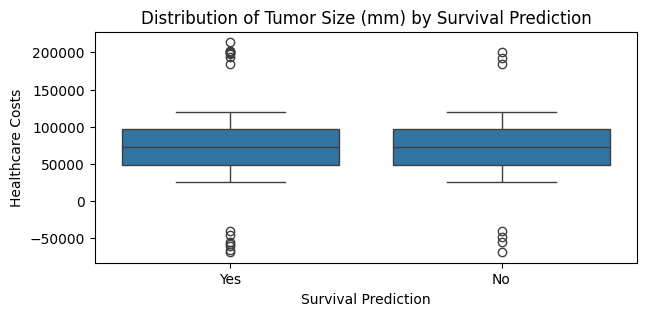

In [26]:
for i in continuous_var_df.drop(columns='Marital Status').columns:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=cancer_df['Survival Prediction'], y=cancer_df['Healthcare Costs'])
    plt.title(f'Distribution of {i} by Survival Prediction')
    plt.show()

In [33]:
(continuous_var_df < 0)

,Healthcare Costs,Incidence Rate per 100K,Marital Status,Mortality Rate per 100K,Tumor Size (mm)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
75030,False,False,False,False,False
75031,False,False,False,False,False
75032,False,False,False,False,False
75033,False,False,False,False,False
